<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/sentiment_analysis_binary_classification_vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import time

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from IPython.display import display
import pickle
from tqdm.notebook import tqdm

In [ ]:
path = '/content/gdrive/My Drive/covid_mining/aclImdb/IMDB Dataset.csv' #this is from kaggle
df = pd.read_csv(path,encoding='UTF-8')
df.columns = ['Text','Label']

def recode_label(label):
    if label == 'positive':
        return 1
    else:
        return 0

df['Label'] = df['Label'].apply(lambda x: recode_label(x))
display(df)
df = df[['Text','Label']]
X = df['Text'].fillna('').tolist()
X = [str(i) for i in X]
y = df['Label'].fillna('').tolist()

,Text,Label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#to remove html tags, lemmatisation . etc etc
additional_stop_words = []                                                      ########调 (optional)

def text_cleanup(text):  
    '''
    Text pre-processing
        return a sentence of cleaned words
    '''
    text = str(text)
    #remove html tags
    text_clean = BeautifulSoup(text, "lxml").text

    ## Convert to lowercase
    text_clean = text_clean.lower()
    ##Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

    ##spliting into tokens
    text_clean = text_clean.split()

    ##Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    ##Lemmatize text ## alternative is to use stemming
    #lemmatizer = WordNetLemmatizer()
    #text_clean = [lemmatizer.lemmatize(w) for w in text_clean]
    
    #ps = PorterStemmer()
    #text_clean = [ps.stem(w) for w in text_clean]
    
    ## Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    #joining the list into a sentence
    mySeparator = " "
    text_clean = mySeparator.join(text_clean)


    return text_clean

txt = r"This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second problem with the movie is it was just bad. Bad acting, bad special effects, bad plot and poor character development. I have seen better episodes of Miami vice."
print('ORIGINAL','\n', txt)
text_cleanup(txt)

ORIGINAL 
 This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second prob

'movie based bible completely leaves christ movie show rapture second coming christ let alone talk quote scriptures end times called great tribulation movie even show bad times seven bowls seven viles seven trumpets judgements boiled second news cast sea changing structure anti christ killed years tribulation movie ended part got correct two prophets use names course would close truth scriptures worst part really wanted good movie wanted take unsaved people feel movie evil counterfeit like everything devil hope take away upcoming movie based left behind books second problem movie bad bad acting bad special effects bad plot poor character development seen better episodes miami vice'

In [ ]:
from tqdm.notebook import tqdm
#for text preprocessing #you can run without doing so

#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

def label_vader(X_test):
    sia = SIA()
    results = []

    for line in X_test:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)

    #print(results[:3])

    df = pd.DataFrame.from_records(results)

    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = 0
    return df.label.tolist()

y_pred = label_vader(X_test)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted');


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62     12483
           1       0.64      0.85      0.73     12517

    accuracy                           0.68     25000
   macro avg       0.71      0.68      0.67     25000
weighted avg       0.71      0.68      0.67     25000



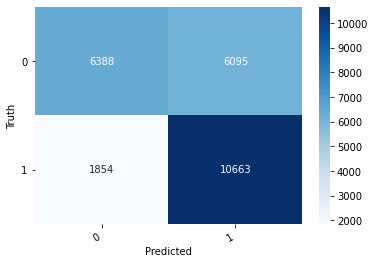

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)